## Latar Belakang
Transjakarta adalah sistem transportasi Bus Rapid Transit (BRT) pertama di Asia Tenggara dan Selatan, yang beroperasi sejak tahun 2004
di Jakarta, Indonesia. Transjakarta dirancang sebagai moda transportasi massal pendukung aktivitas ibu kota yang sangat padat. Transjakarta memiliki 243 halte yang tersebar dalam 13 koridor (rute utama), yang pada awalnya beroperasi dari pukul 05.00–22.00 WIB, dan kini beroperasi selama 24 jam di seluruh koridornya.

    
## Pernyataan Masalah
Kota Jakarta memiliki kurang lebih 10,2 jt jiwa yang tinggal di jakarta. Perusahaan transjakarta yang misi nya mengurangi kemacetan di jakarta menilai sepertinya misi itu belum tercapai sepenuhnya. Perusahaan ingin mengetahui gimana caranya untuk membuat transjakarta lebih profit supaya bisa meningkatkan fasilitas transjakarta menjadi lebih baik.

Sebagai seorang Data Analyst, saya akan mencoba menjawab pertanyaan itu:

Bagaimana mencari cara agar profit dan bisa meningkatkan fasilitas Transjakarta supaya orang-orang lebih banyak yang mau naik Transjakarta dan mungkin bisa mengurangi kemacetan.
    




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data

Dataset ini berisi informasi terkait bulan, kode trayek, dan trayek dari jenis-jenis angkutan Transjakarta beserta jumlah penumpang per kode trayeknya. Ada 6 kolom di dalam dataset transjakarta passengers, yaitu:  

- tahun : Waktu pelaksanaan pengambilan data.
- bulan : Bulan pengambilan data.
- jenis : Jenis angkutan.
- kode_trayek : Kode trayek.
- trayek : Trayek (rute).
- jumlah_penumpang : Jumlah penumpang


Berikut 5 baris teratas dan terbawah dari dataset Transjakarta Passengers 2021.

In [2]:
df = pd.read_csv('TransJakarta Passengers 2021.csv')
df

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616
...,...,...,...,...,...,...
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*.

Pertama, mari kita lihat informasi apakah ada data kosong atau duplikat di dataset.

In [3]:
df.isna().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              2
jumlah_penumpang    0
dtype: int64

In [4]:
df[df['trayek'].isnull()]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
795,2021,12,Mikrotrans,JAK.10B,NaN,4085
796,2021,12,Mikrotrans,JAK.10A,NaN,33992


## Mengisi data yang hilang di kolom trayek dengan data yang sama dengan kode_trayek

In [5]:
df_clean = df.copy()
df_clean

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616
...,...,...,...,...,...,...
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4


In [6]:
df_clean['trayek'][df_clean['kode_trayek']=='JAK.10A'] = 'Gondangdia - Cikini via Salemba Raya'
df_clean['trayek'][df_clean['kode_trayek']=='JAK.10B'] = 'Gondangdia - Cikini via Kramat Raya'

## Variabel data yang baru sekarang sudah bersih tidak ada missing value

In [7]:
df_clean.isnull().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              0
jumlah_penumpang    0
dtype: int64

## Tidak ada data duplikasi di dalam dataset 

In [8]:
df_clean.duplicated().sum()

0

## Menghapus kolom tahun dikarenakan dataset ini hanya pada tahun 2021 jadi kolom tahun dapat di hilangkan

In [9]:
df_clean.drop('tahun',axis=1,inplace=True)
df_clean

,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616
...,...,...,...,...,...
1468,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4


 ## Mengurutkan table dari bulan januari sampe desember

In [10]:
df_clean = df_clean.sort_values('bulan')
df_clean

,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
549,1,Mikrotrans,JAK.11,Tanah Abang - Kebayoran Lama,72135
519,1,Mikrotrans,JAK.40,Harapan Baru - Pulo Gebang via Rawa Kuning,41797
520,1,Mikrotrans,JAK.39,Kalimalang - Duren Sawit,54414
521,1,Mikrotrans,JAK.38,Bulak Ringin - Kampung Rambutan,43994
522,1,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,46026
...,...,...,...,...,...
823,12,Angkutan Umum Integrasi,8K,Batu Sari-Tanah Abang,0
824,12,Angkutan Umum Integrasi,8E,Bintaro - Blok M,0
825,12,Angkutan Umum Integrasi,8D,Joglo - Blok M,0
812,12,BRT,4,Pulo Gadung 2 - Tosari,319411


## Menambahkan data harga untuk ketiga jenis angkutan yang ada yaitu mikrotrans,BRT(Busway), dan angkutan umum integrasi
Karena kekurangan informasi dari dataset ini maka saya berinisiatif untuk melakukan riset dari internet dan menambahkan kolom harga
untuk jenis-jenis angkutan Transjakarta.

In [11]:
df_clean['jenis'].unique()

array(['Mikrotrans', 'Angkutan Umum Integrasi', 'BRT'], dtype=object)

- (Data Riset untuk Harga BRT )https://deskjabar.pikiran-rakyat.com/nasional/pr-1134000809/wah-murah-banget-segini-tarif-busway-atau-bus-transjakarta?page=2

- (Data Riset untuk Harga Mikrotrans) https://www.antaranews.com/berita/2284978/tarif-integrasi-jaklingko-mempermudah-mobilitas-masyarakat

- (Data Riset untuk Harga Angkutan Umum Integrasi) https://www.cnbcindonesia.com/news/20190612194448-4-77998/jadi-lebih-murah-mana-mrt-atau-lrt#:~:text=Dengan%20demikian%2C%20rerata%20tarif%20yang,kilometer%20mencapai%20Rp%20862%2C06.


Dari data riset untuk harga BRT di karenakan tarif harga BRT itu di rentang harga 2000,3500, dan 3500 jadi saya asumsikan untuk memasukan nilai rata-rata dari rentang harga tersebut yakni 3000 rupiah per orang setiap trayek.

Lalu untuk harga angkutan umum integrasi memiliki rentang harga 5000 sampai 14000. Jadi saya juga mengambil nilai rata-rata dari rentang harga tersebut untuk di masukan di dalam kolom harga yakni 9500 rupiah per orang setiap trayek.

Sedangkan untuk mikrotrans itu harga nya 0 alias gratis

In [12]:
conditions = [
    (df_clean['jenis'] == 'Mikrotrans'),
    (df_clean['jenis'] == 'Angkutan Umum Integrasi'),
    (df_clean['jenis'] == 'BRT')
    ]

values = [0,9500,3000]

df_clean['harga'] = np.select(conditions, values)

df_clean.head()

,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,harga
549,1,Mikrotrans,JAK.11,Tanah Abang - Kebayoran Lama,72135,0
519,1,Mikrotrans,JAK.40,Harapan Baru - Pulo Gebang via Rawa Kuning,41797,0
520,1,Mikrotrans,JAK.39,Kalimalang - Duren Sawit,54414,0
521,1,Mikrotrans,JAK.38,Bulak Ringin - Kampung Rambutan,43994,0
522,1,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,46026,0


## Menambahkan kolom total pendapatan tiap trayek

In [13]:
df_clean['total_pendapatan'] = df_clean['jumlah_penumpang'] * df_clean['harga']

df_clean.head()

,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,harga,total_pendapatan
549,1,Mikrotrans,JAK.11,Tanah Abang - Kebayoran Lama,72135,0,0
519,1,Mikrotrans,JAK.40,Harapan Baru - Pulo Gebang via Rawa Kuning,41797,0,0
520,1,Mikrotrans,JAK.39,Kalimalang - Duren Sawit,54414,0,0
521,1,Mikrotrans,JAK.38,Bulak Ringin - Kampung Rambutan,43994,0,0
522,1,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,46026,0,0


## Membuat kolom harga lagi  dengan memasukkan asumsi kalau harga mikrotrans dengan tarif Rp 1000 yang sebelum nya itu adalah Rp 0

In [14]:
conditions = [
    (df_clean['jenis'] == 'Mikrotrans'),
    (df_clean['jenis'] == 'Angkutan Umum Integrasi'),
    (df_clean['jenis'] == 'BRT')
    ]

values = [1000,9500,3000]

df_clean['dengan_harga_mikrotrans'] = np.select(conditions, values)

df_clean.head()

,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,harga,total_pendapatan,dengan_harga_mikrotrans
549,1,Mikrotrans,JAK.11,Tanah Abang - Kebayoran Lama,72135,0,0,1000
519,1,Mikrotrans,JAK.40,Harapan Baru - Pulo Gebang via Rawa Kuning,41797,0,0,1000
520,1,Mikrotrans,JAK.39,Kalimalang - Duren Sawit,54414,0,0,1000
521,1,Mikrotrans,JAK.38,Bulak Ringin - Kampung Rambutan,43994,0,0,1000
522,1,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,46026,0,0,1000


## Menambahkan kolom total_pendapatan dengan harga asumsi mikrotrans adalah Rp 1000

In [15]:
df_clean['total_pendapatan_dengan_mikrotrans'] = df_clean['jumlah_penumpang'] * df_clean['dengan_harga_mikrotrans']

df_clean.head()

,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,harga,total_pendapatan,dengan_harga_mikrotrans,total_pendapatan_dengan_mikrotrans
549,1,Mikrotrans,JAK.11,Tanah Abang - Kebayoran Lama,72135,0,0,1000,72135000
519,1,Mikrotrans,JAK.40,Harapan Baru - Pulo Gebang via Rawa Kuning,41797,0,0,1000,41797000
520,1,Mikrotrans,JAK.39,Kalimalang - Duren Sawit,54414,0,0,1000,54414000
521,1,Mikrotrans,JAK.38,Bulak Ringin - Kampung Rambutan,43994,0,0,1000,43994000
522,1,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,46026,0,0,1000,46026000


In [16]:
# Save data bersih dan sudah di tambahkan kolom baru untuk masuk ke aplikasi Tableau
df_clean.to_excel('data clean transjakarta.xlsx',index=False)

# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis.

Analisis akan kita mulai dari mencoba mengetahui berapa banyak total jumlah penumpang dari tiap jenis angkutan selama setahun penuh

In [17]:
# Menggrup kan supaya tau mana lebih banyak jumlah penumpang dari ketiga jenis
Total_Penumpang_Jenis = df_clean.groupby('jenis')['jumlah_penumpang'].sum()
Total_Penumpang_Jenis

jenis
Angkutan Umum Integrasi    11281390
BRT                        59111356
Mikrotrans                 49915801
Name: jumlah_penumpang, dtype: int64

In [18]:
# Menggrup kan supaya tau mana lebih banyak jumlah penumpang dari ketiga jenis menjadi dataframe
Total_Penumpang_Jenis_DF = df_clean.groupby('jenis')[['jumlah_penumpang']].sum().sort_values('jumlah_penumpang',ascending=False).reset_index()
Total_Penumpang_Jenis_DF

,jenis,jumlah_penumpang
0,BRT,59111356
1,Mikrotrans,49915801
2,Angkutan Umum Integrasi,11281390


## Melihat mana dari ketiga jenis yang memiliki total pendapatan lebih besar

In [19]:
# Dataframe total pendapatan tiap jenis angkutan transjakarta
total_pendapatan = df_clean.groupby('jenis')[['total_pendapatan']].sum().sort_values('total_pendapatan',ascending=False).reset_index()
total_pendapatan

,jenis,total_pendapatan
0,BRT,177334068000
1,Angkutan Umum Integrasi,107173205000
2,Mikrotrans,0


In [20]:
# Dataframe yang berisi total pendapatan jika mikrotrans diasumsikan di ubah harga menjadi Rp 1000
total_pendapatan_dengan_mikro = df_clean.groupby('jenis')[['total_pendapatan_dengan_mikrotrans']].sum().sort_values('total_pendapatan_dengan_mikrotrans',ascending=False).reset_index()
total_pendapatan_dengan_mikro

,jenis,total_pendapatan_dengan_mikrotrans
0,BRT,177334068000
1,Angkutan Umum Integrasi,107173205000
2,Mikrotrans,49915801000


## Data untuk Angkutan Umum Integrasi memiliki anomali jumlah penumpang semua 0 kecuali untuk kode trayek 1R dan 6H yang memiliki 176 dan 8 penumpang untuk bulan Desember

In [21]:
# seleksi dataframe ankutan umum integrasi
df_angkutan_umum = df_clean[df_clean['jenis'] == 'Angkutan Umum Integrasi']

In [22]:
# seleksi untuk menemukan jumlah penumpang yang tidak sama dengan 0 di bulan 12 jenis angkutan umum integrasi
df_angkutan_umum[(df_angkutan_umum['bulan'] == 12)&(df_angkutan_umum['jumlah_penumpang'] != 0)]

,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,harga,total_pendapatan,dengan_harga_mikrotrans,total_pendapatan_dengan_mikrotrans
834,12,Angkutan Umum Integrasi,6H,Senen - Lebak Bulus,8,9500,76000,9500,76000
842,12,Angkutan Umum Integrasi,1R,Senen - Tanah Abang,176,9500,1672000,9500,1672000


## Melihat berapa jumlah penumpang per bulan berdasarkan jenis

In [23]:
# Grouping untuk melihat jumlah penumpang perbulan
groupOfJenis = df_clean.groupby(['jenis','bulan'])[['jumlah_penumpang']].sum()
groupOfJenis

jumlah_penumpang
jenis                   bulan                  
Angkutan Umum Integrasi 1               1144418
                        2                889506
                        3               1163835
                        4               1168871
                        5               1043163
                        6               1099961
                        7                573188
                        8                725174
                        9                990462
                        10              1128449
                        11              1354179
                        12                  184
BRT                     1               4828190
                        2               4793696
                        3               5948741
                        4               5909231
                        5               5455493
                        6               5419422
                        7               2272391
                        8               2866177
                        9               4368891
                        10              5196358
                        11              5999289
                        12              6053477
Mikrotrans              1               3824758
                        2               3698297
                        3               4482432
                        4               4546512
                        5               4324680
                        6               4527272
                        7               3737526
                        8               2906877
                        9               3172154
                        10              4341452
                        11              5064976
                        12              5288865

## Barplot ranking untuk jenis mana yang lebih banyak penumpang

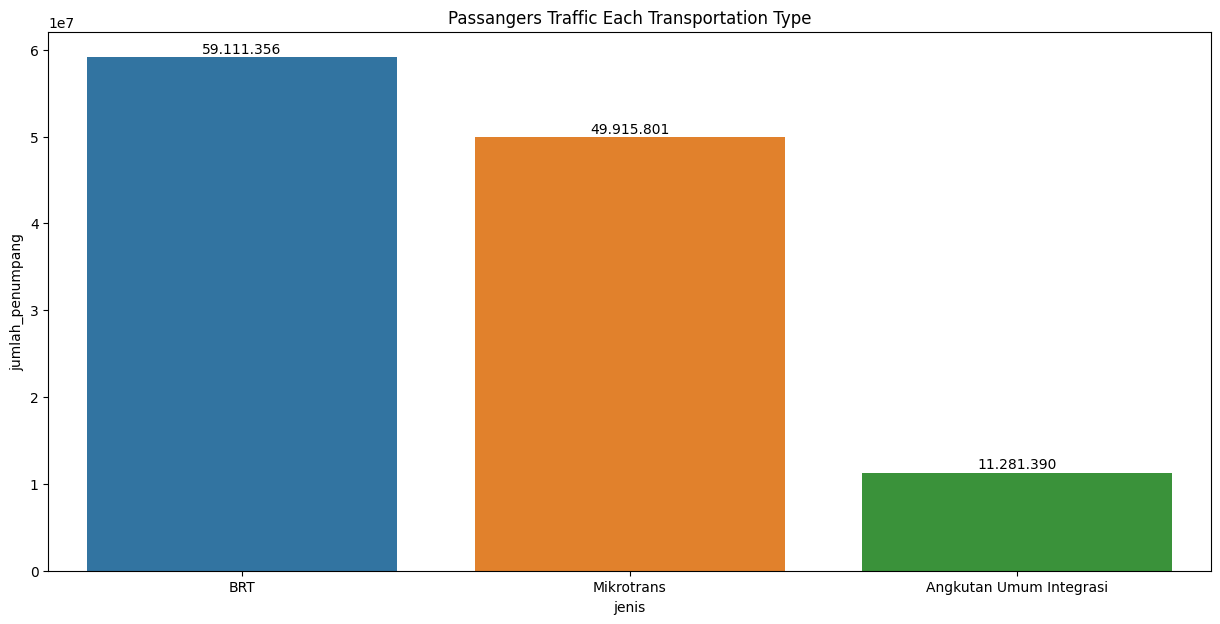

In [24]:
bar_label = ['59.111.356','49.915.801','11.281.390']
plt.figure(figsize=(15,7))
ax = sns.barplot(data=Total_Penumpang_Jenis_DF, x="jenis", y="jumlah_penumpang",errorbar=None)
plt.title('Passangers Traffic Each Transportation Type')
for i in range(0,3):
    ax.annotate(text=bar_label[i],xy=(i,Total_Penumpang_Jenis_DF['jumlah_penumpang'][i]),ha='center',va='center',textcoords='offset points',xytext=(0,6))

Ternyata bisa kita lihat total penumpang selama tahun 2021 terdiri dari : 
- Angkutan umum integrasi : 11.281.390 orang
- BRT (Busway) : 59.111.359 orang
- Mikrotrans : 49.915.801 orang

ternyata diketahui busway memiliki total jumlah penumpang paling tinggi dan diikuti mikrotrans sebagai kedua paling tinggi 

## Visualisasi bagaimana jumlah penumpang tiap bulan per jenis angkutan umum

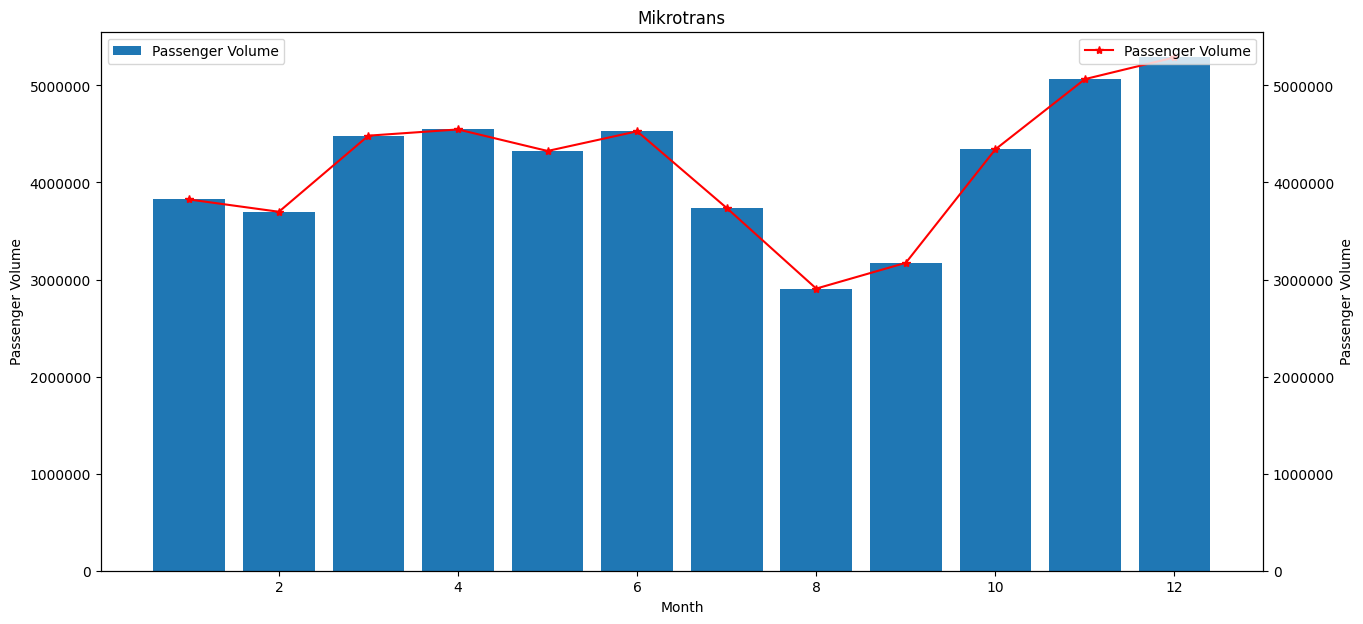

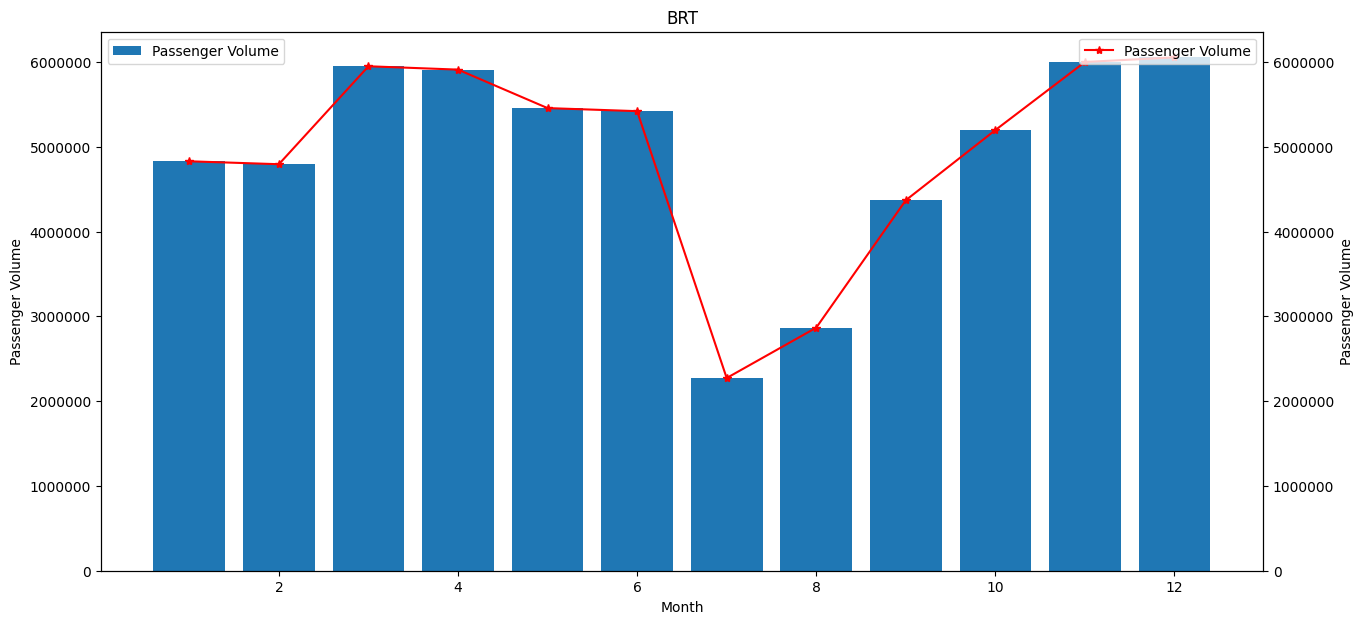

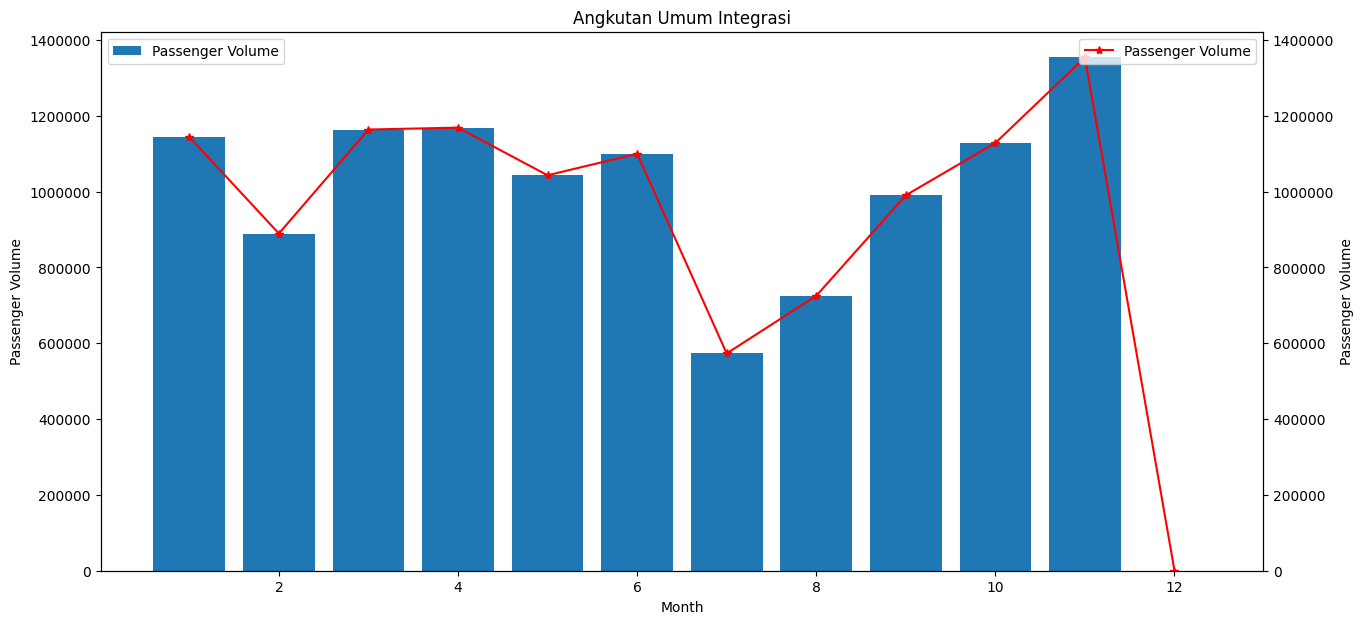

In [25]:
jenis_list = list(df['jenis'].unique())

for jenis in jenis_list:
    data = groupOfJenis.loc[jenis]
    fig, ax = plt.subplots(figsize=(15,7))
    ax2 = ax.twinx()
    
    ax.bar(data.index.get_level_values('bulan'), 
           data['jumlah_penumpang'], 
           label='Passenger Volume')
    
    ax.set_title(jenis)
    ax.set_xlabel('Month')
    ax.set_ylabel('Passenger Volume')
    ax.ticklabel_format(style='plain', axis='y') 

    ax2.plot(data.index.get_level_values('bulan'), 
             data['jumlah_penumpang'], 
             color='r', 
             marker='*', 
             label='Passenger Volume')
    
    ax2.set_ylabel('Passenger Volume')
    ax2.set_ylim(0, ax.get_ylim()[1])
    ax2.ticklabel_format(style='plain', axis='y') 
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()

Dari visualisasi di atas bisa kita lihat bahwa dari ketiga jenis angkutan umum memiliki traffic yang cukup ramai perbulannya. Lalu dengan pola yang sama yaitu setelah bulan 6 ada penurunan jumlah penumpang tapi bertahap naik lagi tiap bulan.

Dapat kita ketahui juga untuk jenis angkutan umum integrasi memiliki anomali dimana pada bulan 12 itu jumlah penumpangnya mendadak hanya 200 an

## Membuat visualisasi trayek mana yang jumlah penumpangnya terbanyak dan terendah

In [29]:
# Grouping data untuk mencari jumlah penumpang tiap trayek 5 teratas dan 5 terbawah
grouped = df.groupby('trayek')['jumlah_penumpang'].sum().reset_index()
sorted_grouped = grouped.sort_values('jumlah_penumpang', ascending=False)
sorted_grouped_bottom = grouped.sort_values('jumlah_penumpang', ascending=True)
sorted_grouped

,trayek,jumlah_penumpang
5,Blok M - Kota,10079752
75,Pinang Ranti - Pluit,7694406
34,Kalideres - Pasar Baru,5250726
59,Lebak Bulus - Harmoni,5122397
37,Kampung Melayu - Ancol,4902814
...,...,...
89,Ragunan - Departemen Pertanian,1386
17,Dukuh Atas - Casablanca via Epicentrum Raya,608
108,Stasiun Manggarai - Ragunan,377
54,Kota Tua Explorer,376


In [30]:
sorted_grouped_bottom

,trayek,jumlah_penumpang
114,Taman Kota Intan - Museum Bahari,232
54,Kota Tua Explorer,376
108,Stasiun Manggarai - Ragunan,377
17,Dukuh Atas - Casablanca via Epicentrum Raya,608
89,Ragunan - Departemen Pertanian,1386
...,...,...
37,Kampung Melayu - Ancol,4902814
59,Lebak Bulus - Harmoni,5122397
34,Kalideres - Pasar Baru,5250726
75,Pinang Ranti - Pluit,7694406


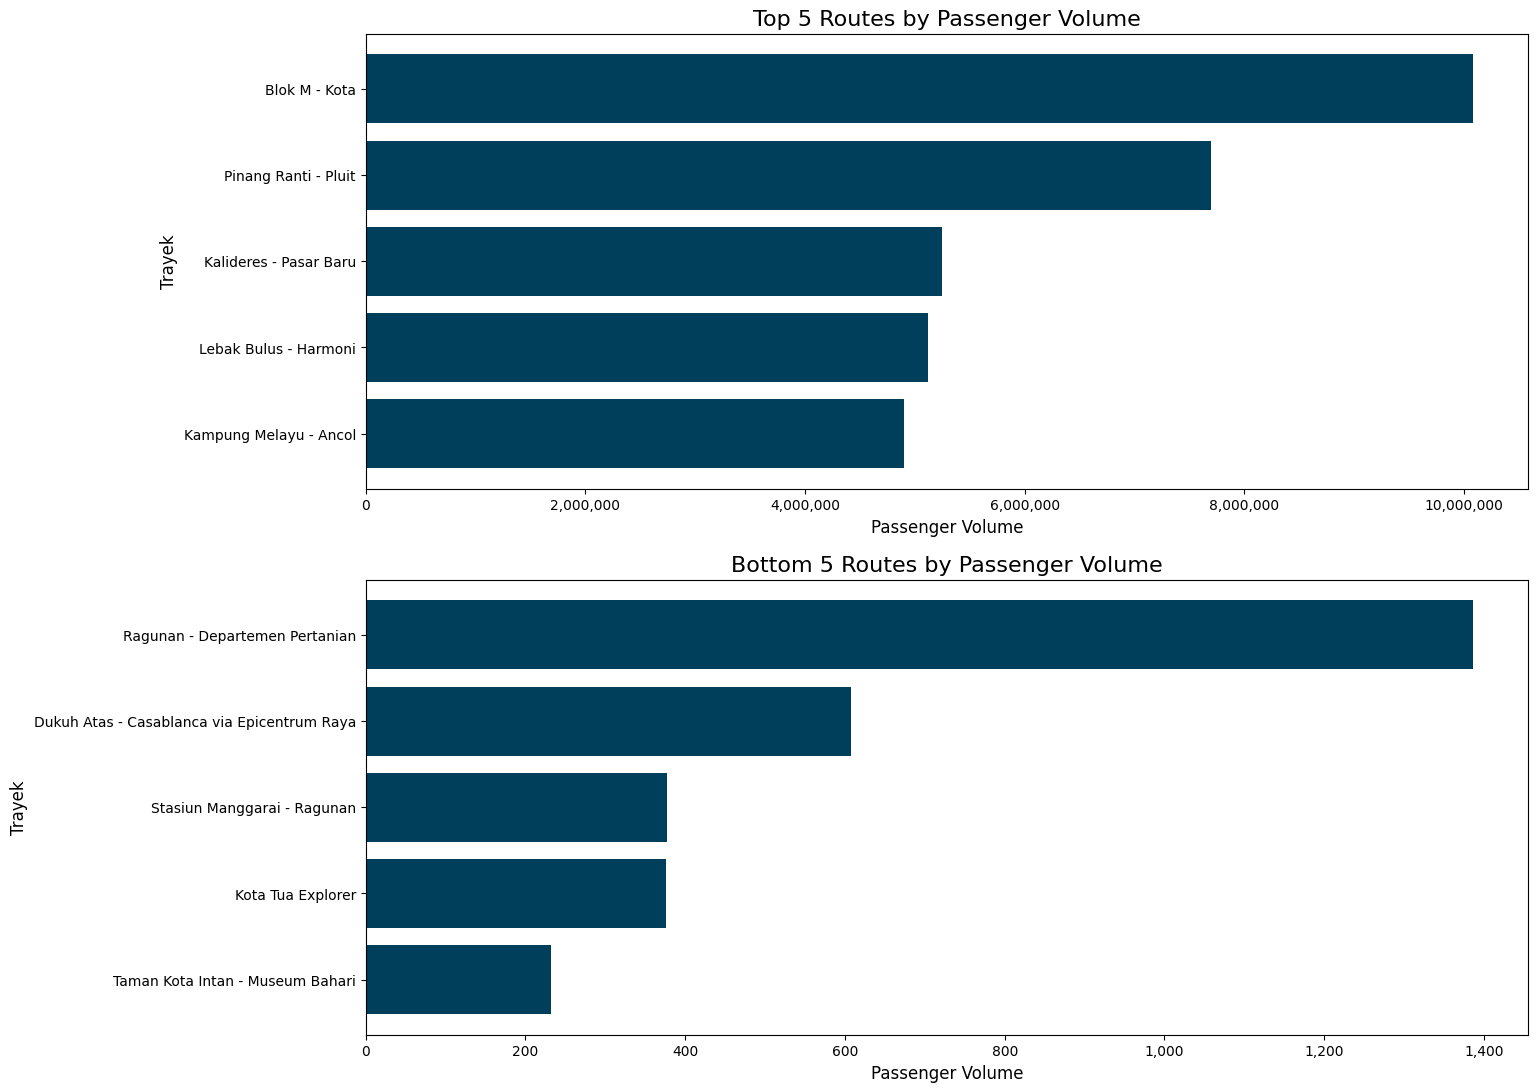

In [27]:
# Visualisasi untuk 5 trayek dengan jumlah penumpang terbanyak dan 5 trayek dengan jumlah penumpang paling sedikit
top_routes = sorted_grouped.head().sort_values('jumlah_penumpang')
bottom_routes = sorted_grouped_bottom.head().sort_values('jumlah_penumpang')

fig, ax = plt.subplots(2,1,figsize=(15, 13))
ax[0].barh(top_routes['trayek'], top_routes['jumlah_penumpang'], color='#003f5c')

ax[0].set_title('Top 5 Routes by Passenger Volume', fontsize=16)
ax[0].set_xlabel('Passenger Volume', fontsize=12)
ax[0].set_ylabel('Trayek', fontsize=12)
ax[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax[1].barh(bottom_routes['trayek'], bottom_routes['jumlah_penumpang'], color='#003f5c')

ax[1].set_title('Bottom 5 Routes by Passenger Volume', fontsize=16)
ax[1].set_xlabel('Passenger Volume', fontsize=12)
ax[1].set_ylabel('Trayek', fontsize=12)
ax[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()


Dari grafik di atas kita bisa mengetahui bahwa : 
- Rute Blok M - Kota memiliki total jumlah penumpang selama setahun mencapai 10.079.752 orang yang berarti pasti halte-halte Blok M - Kota sangat padat. Diikuti juga dengan rute Pinang Ranti - Pluit yang total jumlah penumpangnya dalam setahun mencapai 7,694,406 orang.

- Bisa kita lihat juga ternyata ada rute yang sepi juga dalam setahun seperti rute Taman Kota Intan - Museum Bahari itu hanya memiliki 232 orang diikuti juga rute Kota Tua Explorer 376 orang dalam setahun.

## Barplot perbandingan total pendapatan antara jika mikrotrans gratis dan jika mikrotrans di beri asumsi harga Rp 1000

Text(0.5, 1.0, 'Mikrotrans Assumsption with price (Rp 1000)')

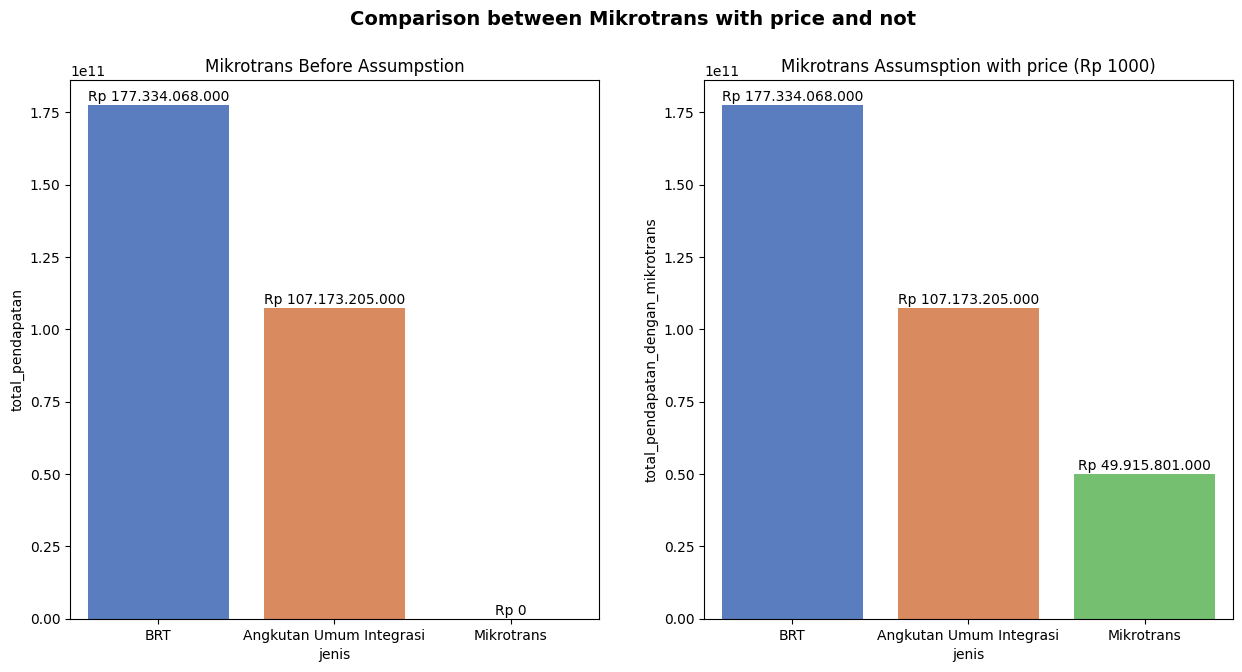

In [28]:
bar_total = ['Rp 177.334.068.000','Rp 107.173.205.000','Rp 0']
bar_total_mikro = ['Rp 177.334.068.000','Rp 107.173.205.000','Rp 49.915.801.000']
figure, axes = plt.subplots(1, 2,  figsize=(15,7))
figure.suptitle('Comparison between Mikrotrans with price and not', size=14, fontweight='bold')
sns.barplot(x='jenis', 
            y='total_pendapatan', 
            data=total_pendapatan, 
            palette='muted',
            ax=axes[0])
for i in range(0,3):
    axes[0].annotate(text=bar_total[i],xy=(i,total_pendapatan['total_pendapatan'][i]),ha='center',va='center',textcoords='offset points',xytext=(0,6))            
axes[0].set_title('Mikrotrans Before Assumpstion')

sns.barplot(x='jenis', 
            y='total_pendapatan_dengan_mikrotrans', 
            data=total_pendapatan_dengan_mikro,
            palette='muted',
            ax=axes[1])
for i in range(0,3):
    axes[1].annotate(text=bar_total_mikro[i],xy=(i,total_pendapatan_dengan_mikro['total_pendapatan_dengan_mikrotrans'][i]),ha='center',va='center',textcoords='offset points',xytext=(0,6))
axes[1].set_title('Mikrotrans Assumsption with price (Rp 1000)')

Grafik di atas merupakan perbandingan antara harga mikrotrans yang awalnya gratis dengan harga mikrotrans bila dikenakan tarif Rp1000.
Jika dilihat bahwa hanya dengan menambahkan tarif Rp1000 untuk angkutan mikrotrans bisa mendapatkan pendapatan senilai Rp 49 milyar dalam setahun.

# Kesimpulan dan Rekomendasi 

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut tentang data Transjakarta :
* Jumlah penumpang Transjakarta itu perbulan mencapai 4 jt orang perbulan.
* Yang jumlah penumpang perhari nya untuk Transjakarta 200 rb orang per hari (dihitung dari 20 hari kerja)
* Total jumlah penumpang dalam setahun yaitu BRT memiliki 59,111,356 jumlah penumpang, Mikrotrans memiliki 49,915,801 jumlah penumpang sedangkan Angkutan Umum Integrasi memiliki 11.281.390 jumlah penumpang.
* Total pendapatan dalam setahun dari masing-masing jenis angkutan yaitu BRT memiliki pendapatan 177 milyar rupiah, Mikrotrans memiliki pendapatan 0 rupiah, dan Angkutan Umum Integrasi memiliki pendapatan 107 milyar rupiah
* Trayek yang paling rame dari Transjakarta adalah trayek dari BRT yang berpusat di Jakarta Pusat

**Rekomendasi**

Berdasarkan data dan analisis di atas : 

- Saya merekomendasikan Untuk menambah pendapatan supaya untuk memperbaiki fasilitas Transjakarta. Membuat tarif Mikrotrans menjadi Rp 1000 atau Rp 2000 atau bisa juga menaikkan tarif BRT (Busway) menjadi flat Rp 5000 dikarenakan 2 jenis angkutan itu memiliki total jumlah penumpang yang banyak hanya selisih 10 jt orang dalam setahun.

- Dengan membuat tarif naik kita bisa menambah bus/mikrotrans dan memperbaiki halte-halte berikut bus/mikrotrans supaya armadanya semakin banyak jadi mengurangi kepadatan dalam 1 bus/mikrotrans sehingga orang-orang jadi lebih nyaman dengan naik Transjakarta.

- Saya juga merekomendasikan untuk memindahkan beberapa armada BRT (busway) di rute yang sepi untuk ke rute yang ramai untuk mengurangi kepadatan yang terjadi di rute yang ramai.

Dengan ditambahkannya atau dinaikan tarif Transjakarta diharapkan orang-orang menengah ke atas lebih mau naik Transjakarta dikarenakan nyaman dan murah. Jika rencana ini berhasil maka bisa jadi akan mengurangi angka kemacetan dan polusi udara di jakarta juga.